In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = "/Users/mac/6 semester Courses/Data Visualization/Project/combined_dataset.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df_info = df.info()
df_head = df.head()
df_description = df.describe(include='all')

df.shape, df.columns, df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

((1197, 15),
 Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
        'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
        'no_of_style_change', 'no_of_workers', 'actual_productivity'],
       dtype='object'),
 date                      object
 quarter                   object
 department                object
 day                       object
 team                       int64
 targeted_productivity    float64
 smv                      float64
 wip                      float64
 over_time                  int64
 incentive                  int64
 idle_time                float64
 idle_men                   int64
 no_of_style_change         int64
 no_of_workers            float64
 actual_productivity      float64
 dtype: object)

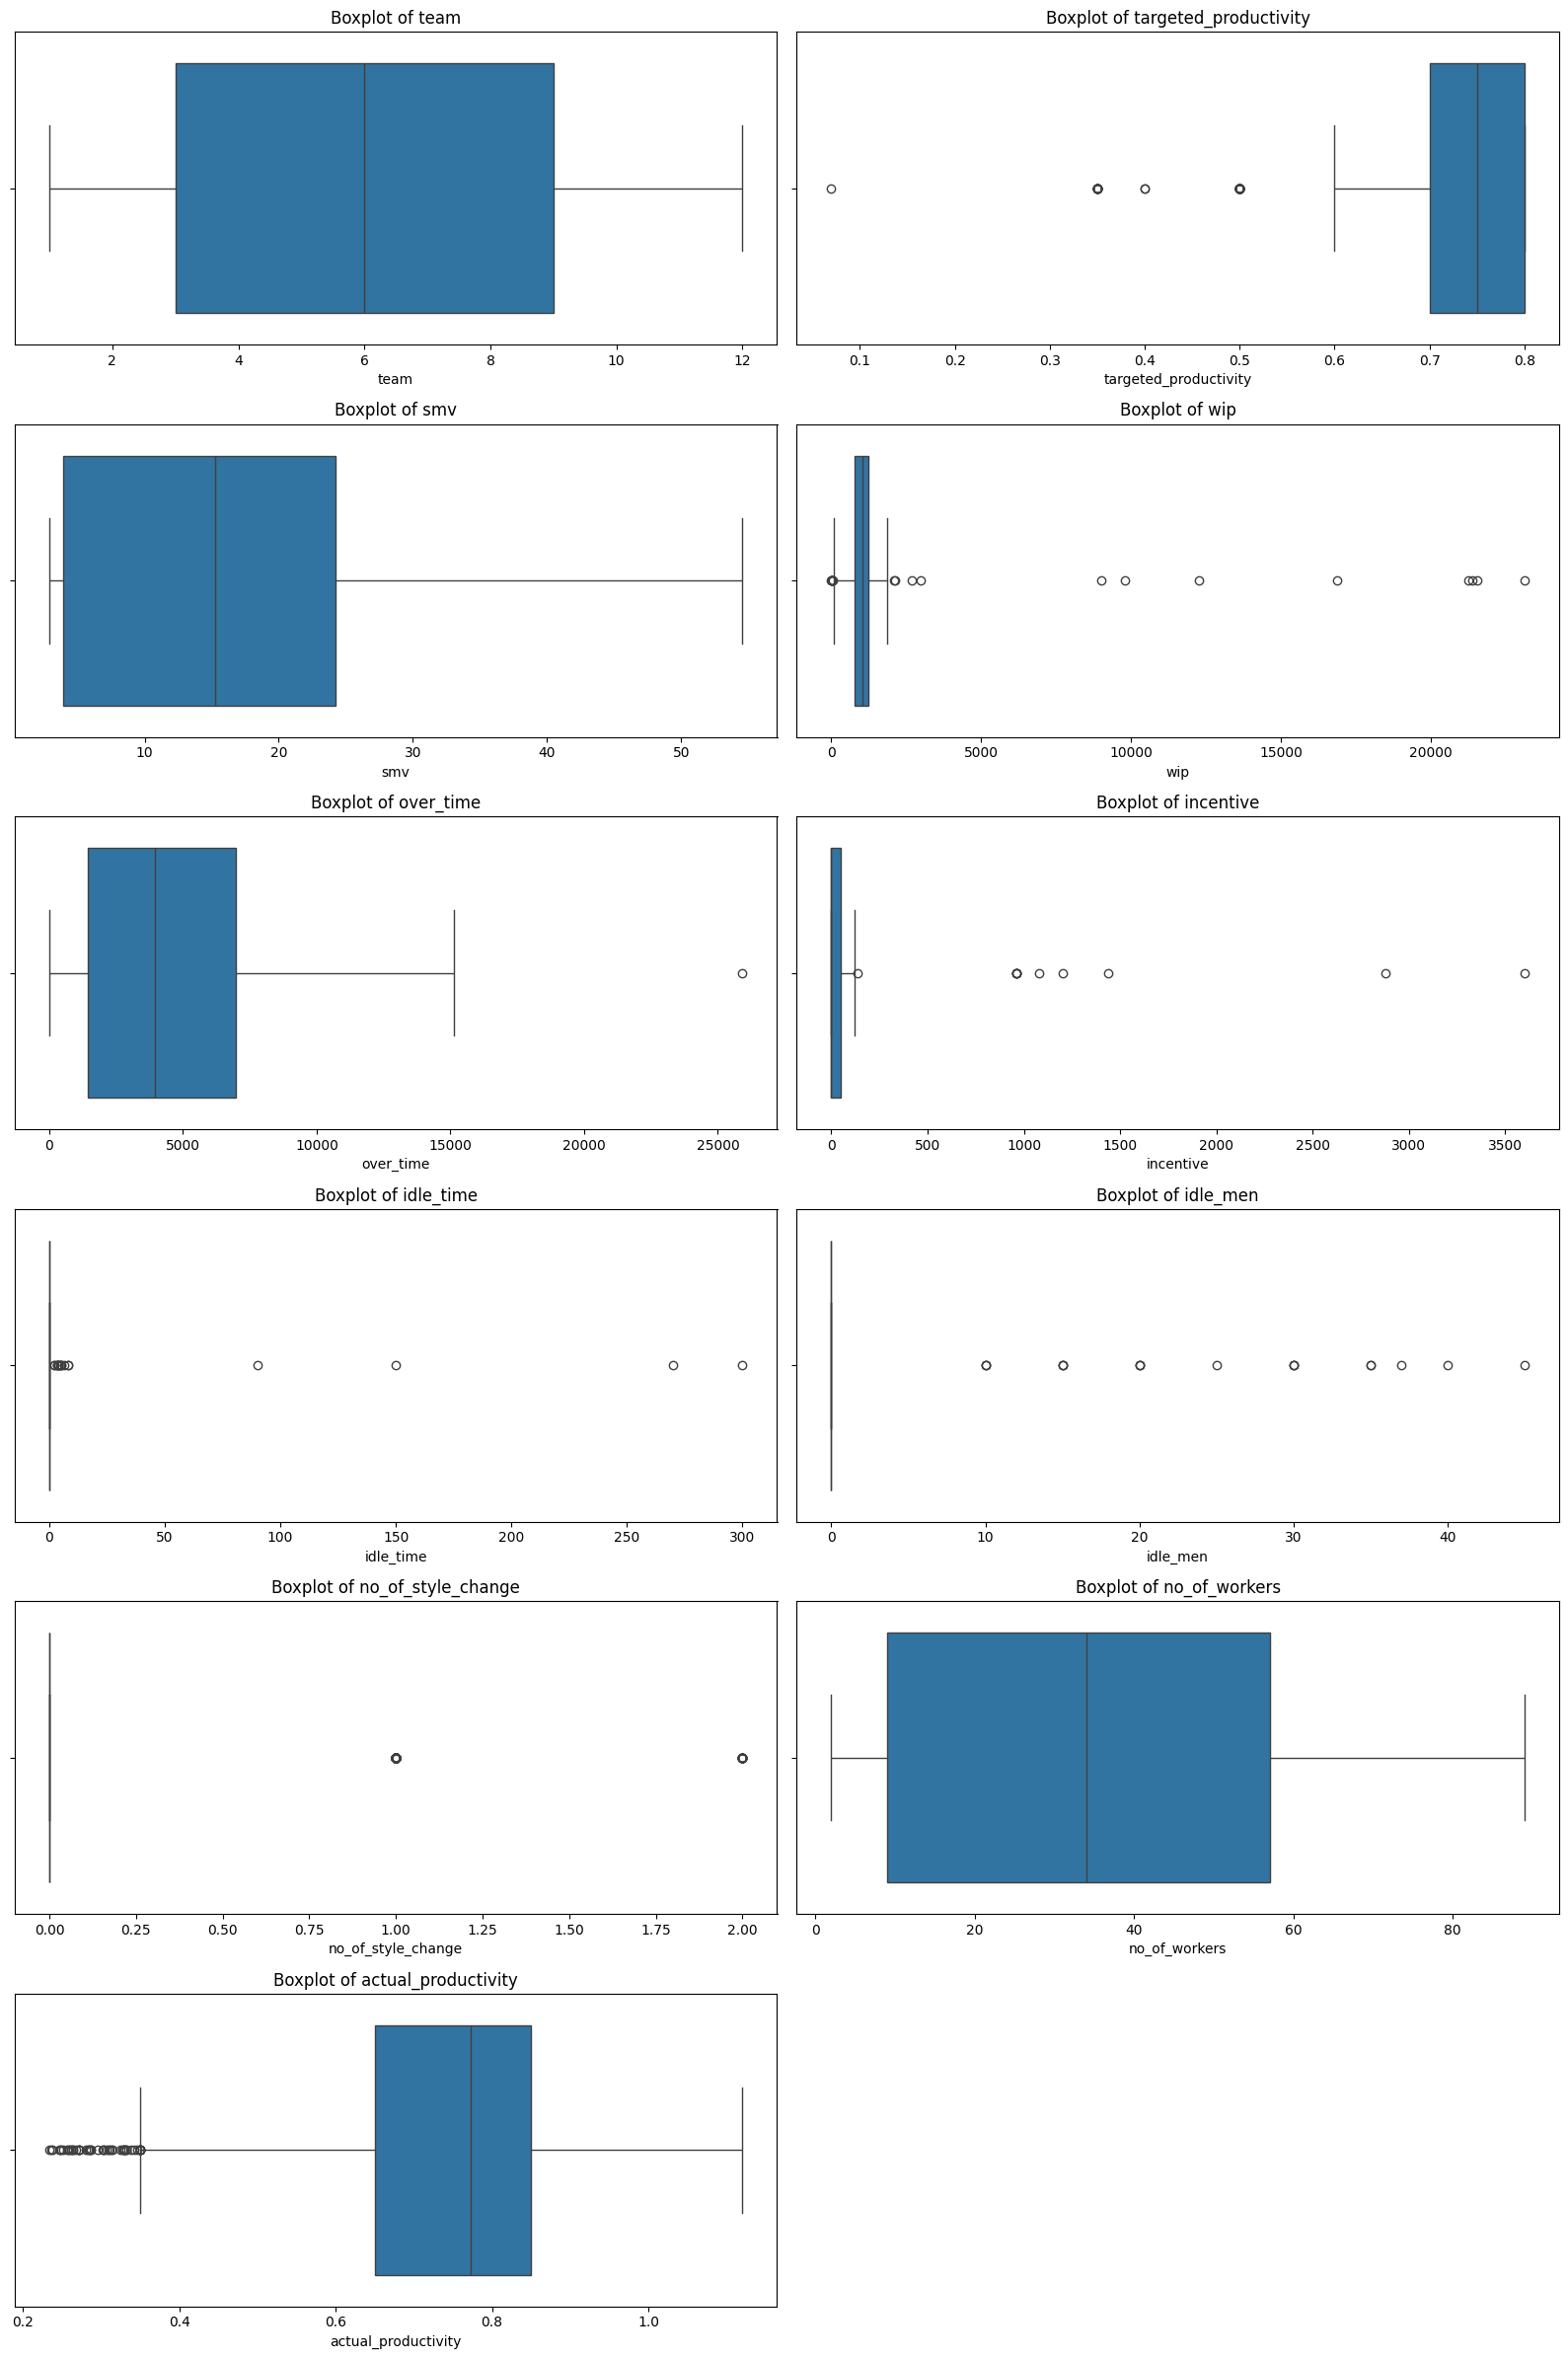

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate required rows and columns
num_plots = len(numerical_cols)
ncols = 2
nrows = (num_plots + ncols - 1) // ncols  # ensures all columns fit

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 4))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any extra axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


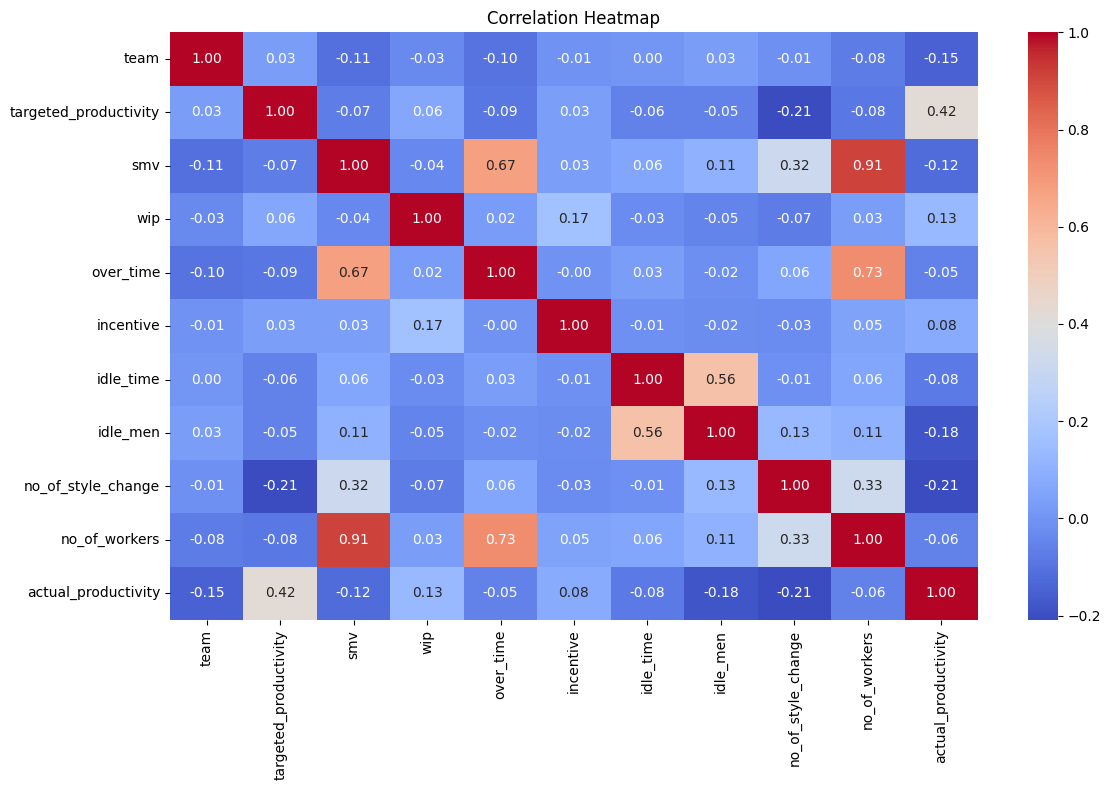

In [4]:
# Recalculate correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


/var/folders/f3/7pv45xmd14qfqs8zmsldw8pw0000gn/T/ipykernel_52225/2443225211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='department', palette='Set2')


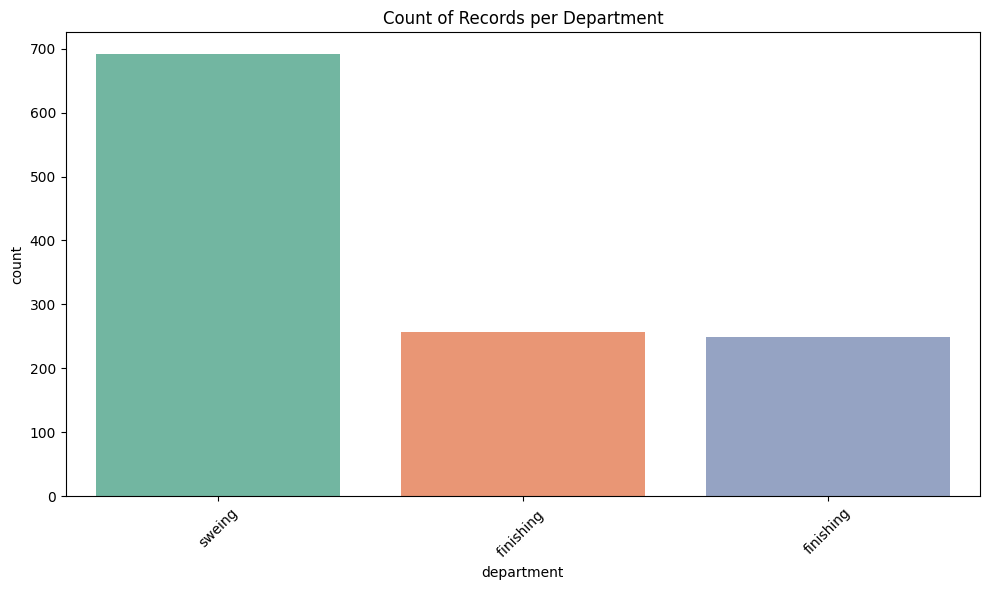

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='department', palette='Set2')
plt.title('Count of Records per Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/f3/7pv45xmd14qfqs8zmsldw8pw0000gn/T/ipykernel_52225/2755597561.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='day', y='actual_productivity', palette='coolwarm', ci=None)
/var/folders/f3/7pv45xmd14qfqs8zmsldw8pw0000gn/T/ipykernel_52225/2755597561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day', y='actual_productivity', palette='coolwarm', ci=None)


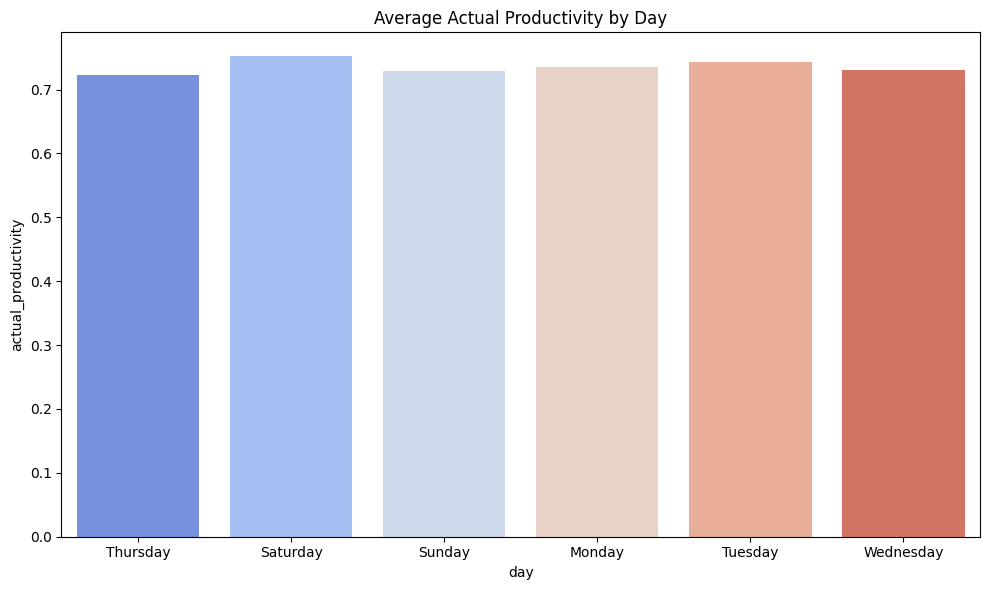

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='day', y='actual_productivity', palette='coolwarm', ci=None)
plt.title('Average Actual Productivity by Day')
plt.tight_layout()
plt.show()


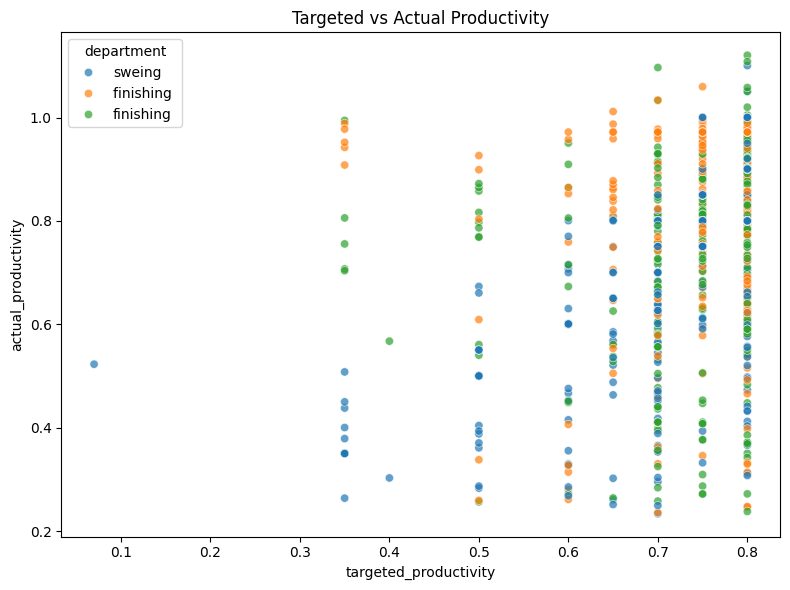

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='targeted_productivity', y='actual_productivity', hue='department', alpha=0.7)
plt.title('Targeted vs Actual Productivity')
plt.tight_layout()
plt.show()


/var/folders/f3/7pv45xmd14qfqs8zmsldw8pw0000gn/T/ipykernel_52225/2292789153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='quarter', y='actual_productivity', palette='pastel')


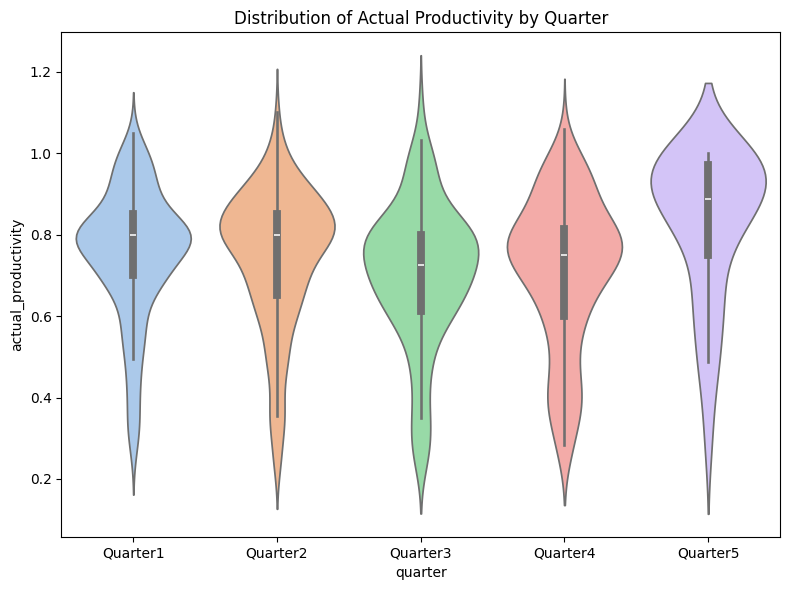

In [8]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='quarter', y='actual_productivity', palette='pastel')
plt.title('Distribution of Actual Productivity by Quarter')
plt.tight_layout()
plt.show()


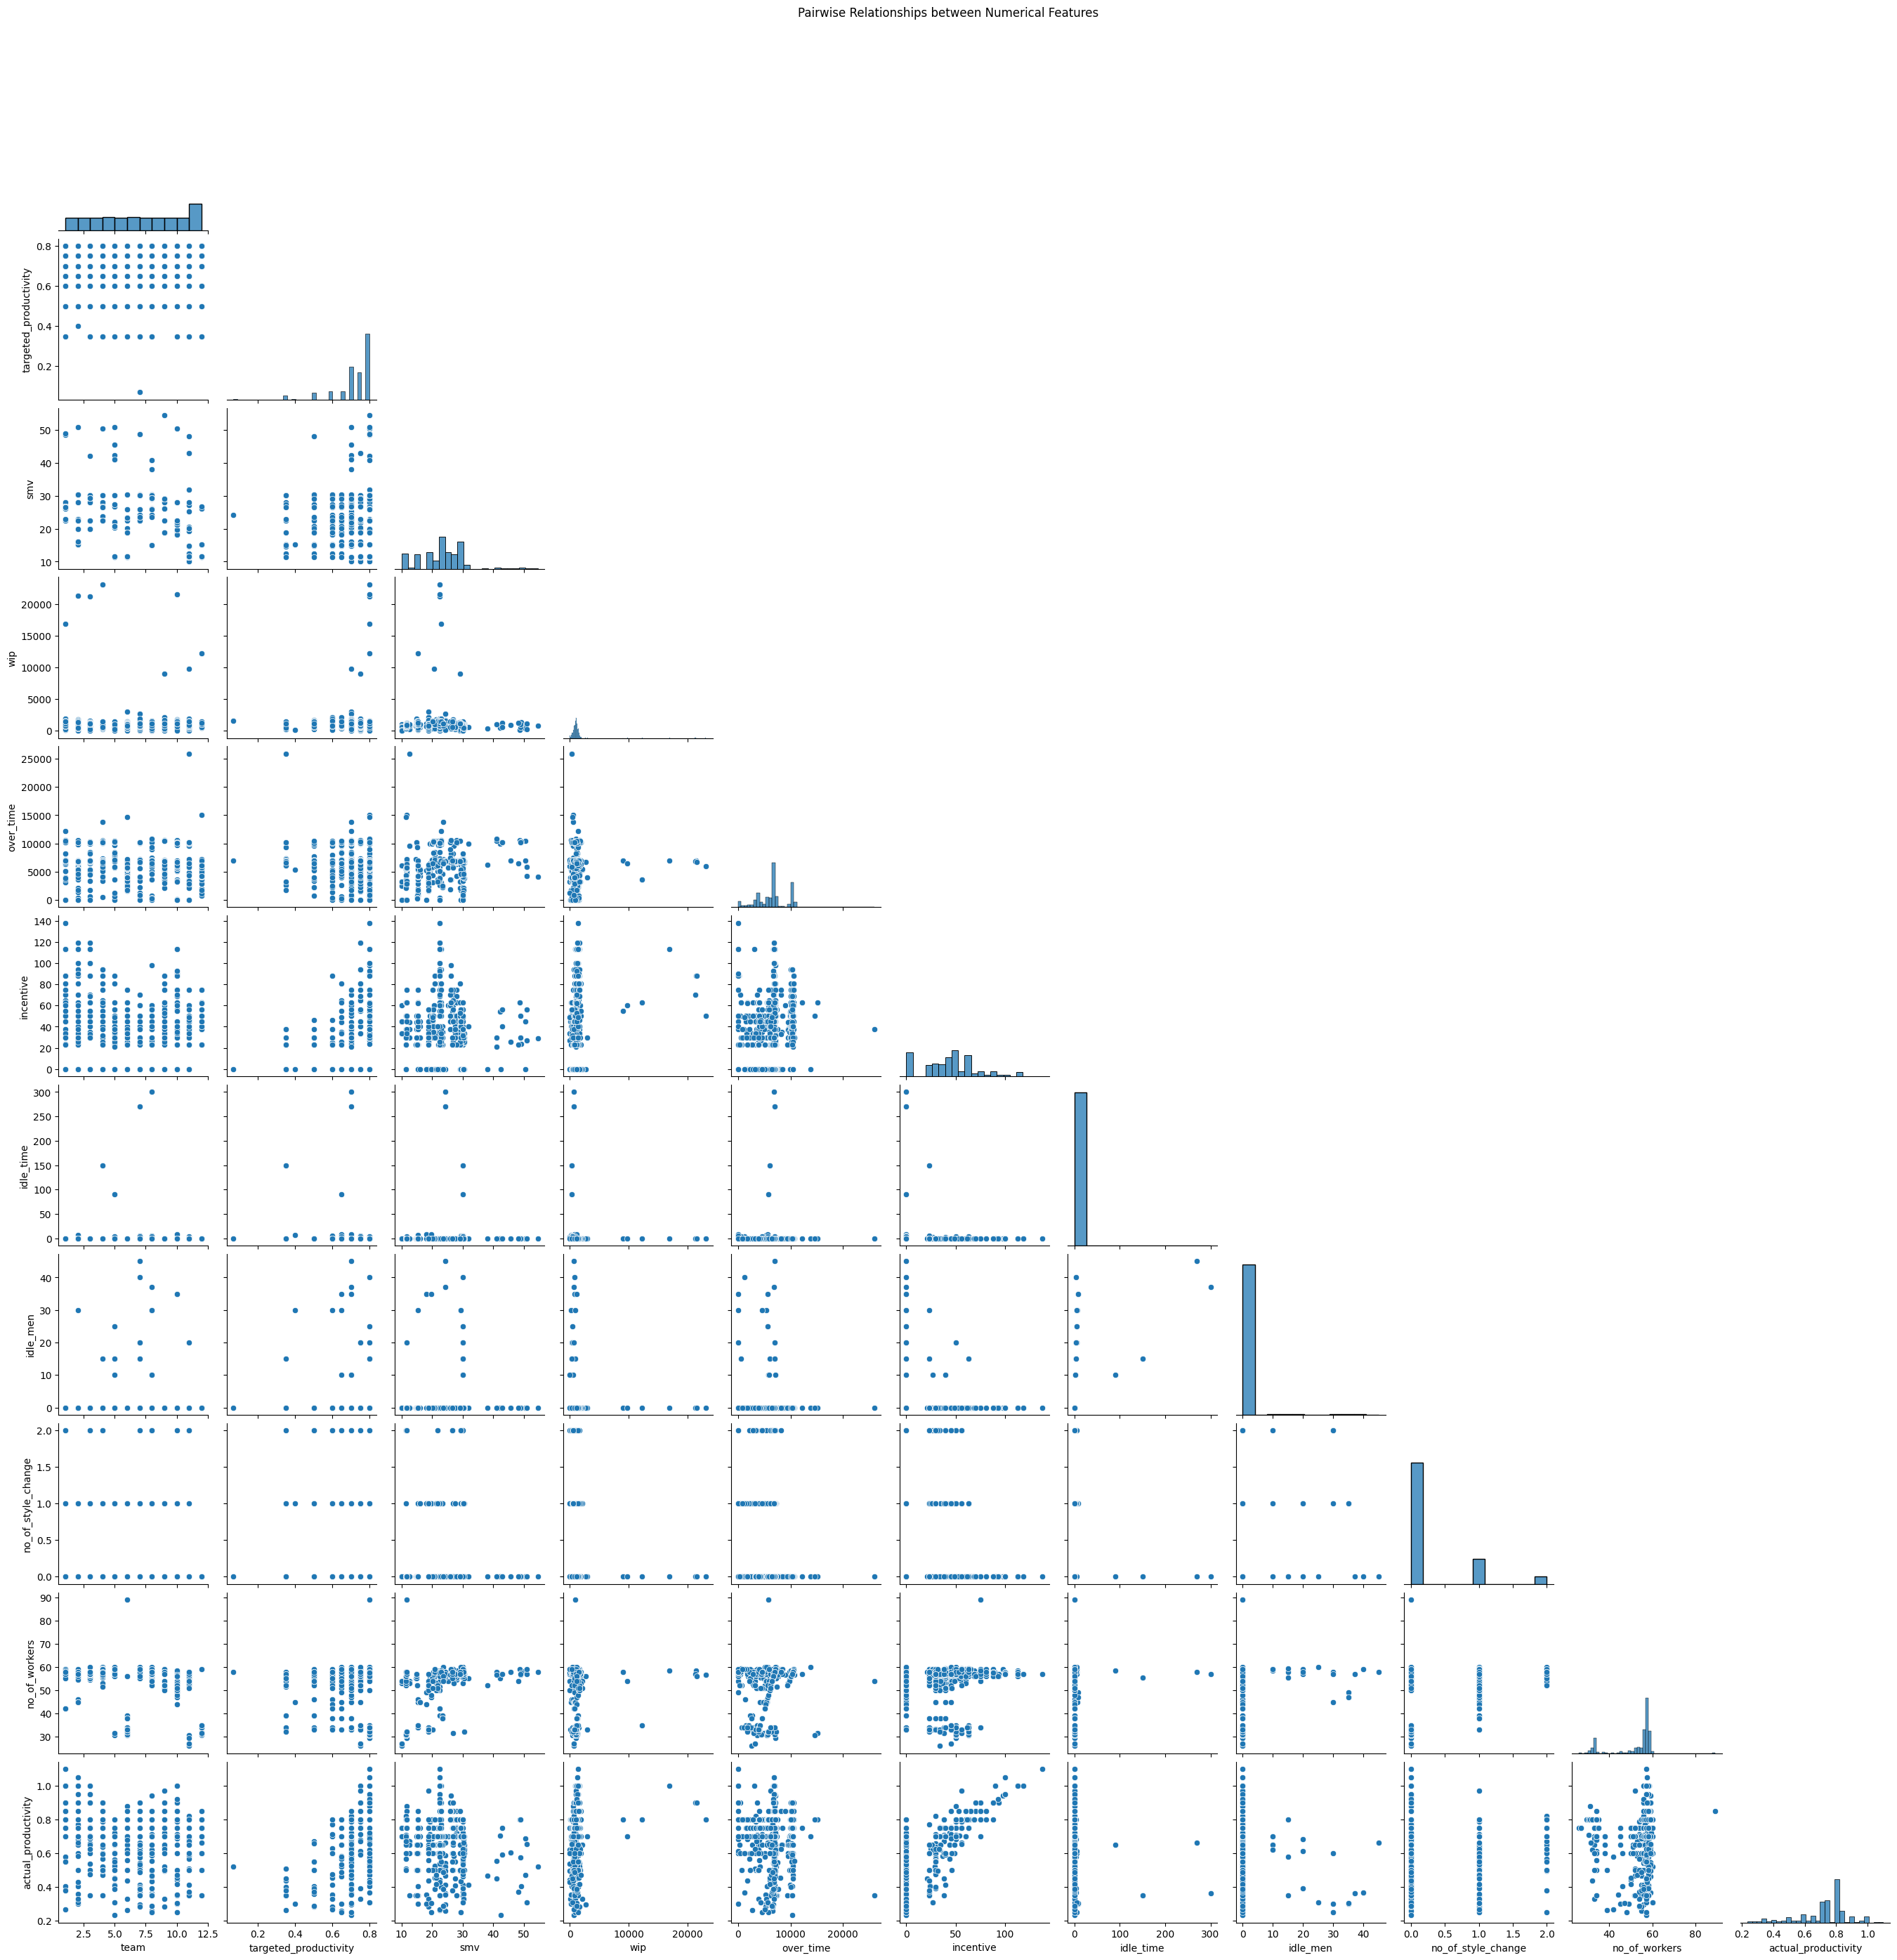

In [9]:
# This can take a moment — optional to sample a subset if dataset is large
sns.pairplot(df[numerical_cols].dropna(), corner=True)
plt.suptitle('Pairwise Relationships between Numerical Features', y=1.02)
plt.show()


In [10]:
# Drop 'wip' column due to high missing percentage
df.drop(columns=['wip'], inplace=True)

# If any remaining missing values, fill or drop depending on context
df = df.dropna()  # Or use df.fillna(method='ffill') if appropriate

# Verify missing values handled
print(df.isnull().sum())


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [11]:
# Check and remove duplicates
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to selected columns
for col in ['incentive', 'over_time', 'idle_time']:
    df = remove_outliers_iqr(df, col)

# Check shape
df.shape


(1167, 14)

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Label encoding
label_cols = ['day', 'quarter', 'department', 'team']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the final dataset
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01/01/2015,0.0,1.0,0.6,0.636364,1.000000,0.450252,0.468254,0.823529,0.0,0.0,0.0,0.655172,0.797332
1,01/01/2015,0.0,0.5,0.6,0.000000,0.931507,0.020132,0.063492,0.000000,0.0,0.0,0.0,0.068966,0.736180
2,01/01/2015,0.0,1.0,0.6,0.909091,1.000000,0.164731,0.242063,0.420168,0.0,0.0,0.0,0.327586,0.639274
3,01/01/2015,0.0,1.0,0.6,1.000000,1.000000,0.164731,0.242063,0.420168,0.0,0.0,0.0,0.327586,0.639274
4,01/01/2015,0.0,1.0,0.6,0.454545,1.000000,0.445219,0.126984,0.420168,0.0,0.0,0.0,0.620690,0.639062
